In [50]:
import matplotlib.pyplot as plt
import networkx as nx

from time import sleep
from tqdm import tqdm


In [47]:
'''for i in tqdm(range(100000)):
    text = 5
    sleep(0.0001)'''

100%|██████████| 100000/100000 [00:14<00:00, 6961.88it/s]


In [9]:

#OPENING FILE WITH PATHWAYS AND CREATING A DICTIONARY

#trial data
'''
path = '/Users/Iva/Documents/project/data/KEGG.all.v6.1.entrez.gmt.txt'
data = open (path)
'''
path = "/Users/Iva/Documents/project/data/msigdb_pathways.gmt.txt"
data = open (path)

data_dictionary = {}
l = []
for i in data:
    #key, value = i.split()
    #data_dictionary[key] = value
    l.append (i.split())


data_dictionary = {item[0]:item[2:] for item in l} #working dictionary
#starts from position 2 to remove links from the dictionary


keys = list(data_dictionary.keys()) #list of keys


#DEFINING KEYWORDS IN DISEASES



nf = ["RAS", "T_CELL", "SCHWANN", "NEURON"]
alps = ["APOPTOSIS", "CELL_DEATH", "FAS", "IMMUNE_SYSTEM", "IMMUNE_RESPONSE", "LYMPHOCYTE"]
hem1 = ["ACTIN", 'CELL_MIGRATION', "CYTOSKELETON", "LYMPHOCYTE", "PHAGOCYTOSIS", "IMMUNE_SYSTEM", "IMMUNE_RESPONSE", "MTOR"]
wdr1 = ["ACTIN", 'CELL_MIGRATION', "JUNCTION", "CYTOSKELETON", "PEBOW_COMPLEX", "5.8S_RRNA", "PLATELET", "IMMUNE_SYSTEM", "IMMUNE_RESPONSE"]
ttc7a = ["PI4K", "SIGNALING", 'PHOSPHATIDYLINOSITOL_SIGNALING', 'PHOSPHATIDYLINOSITOL', 'PLASMA_MEMBRANE', "IMMUNE_SYSTEM", "IMMUNE_RESPONSE"]





'''nf = ["RAS", "T_CELL", 'T_CELL_RECEPTOR']
alps = ["APOPTOSIS", "CELL_DEATH", "FAS", "FASL"]
hem1 = ["ACTIN", "F_ACTIN", "ACTIN_ASSEMBLY", "ACTIN_POLIMERISATION", 'CELL_MIGRATION', "CYTOSKELETON"]
wdr1 = ["ACTIN", "F_ACTIN", "ACTIN_DISASSEMBLY", "CYTOSKELETON", "PEBOW_COMPLEX", "5.8S_RRNA", "PLATELET"]
ttc7a = ["PI4K", "SIGNALING", 'PHOSPHATIDYLINOSITOL_SIGNALING', 'PHOSPHATIDYLINOSITOL', 'PLASMA_MEMBRANE']'''


data.close ()

In [78]:
for i in G_monster.neighbors('3071'):
    print (i)

10152
8522
10006
55660
8290
4851
302
23191
26999


In [10]:
#EXPLORE DATA - NUMBER OF PATHWAYS, PROTEINS INVOVED..

#output is dictionary called data_explored {keywork:[all pathways, all protein, all nr proteins]}
#Function that takes list of key words as an argument
#Gives back list of pathways involved, list all proteins and list non-redundant proteins FOR EACH KEYWORD 
#Dictionary keys are pathway names and value is list of Entrez\other database prot names

def exploredata (dictionary, disease):
    
    keys = list(dictionary.keys()) #list of all keys in given dictionary 
    data_explored = {}
    
    
    for i in disease:
        list1 = [[],[],[]] # list of pathways, list of all proteins, list of non-redundant proteins
        
        
        #create a list of pathways (keys) that have keyword i
        for j in keys:
            if j.find(str(i)) != -1:
                list1[0].append (j) #ovdje moze append jer je j ustvari string s nazivom imena
        
        
        #add n of pathways for keyword i
        #list1[1] = len (list1[0])
            
        #add total n of proteins in all pathways for keyword i
        list_r = []
        
        for k in list1[0]:     
            for l in dictionary[k]: #l is a protein in the pathway
                list_r.append (l)
                
        list1[1] = list_r #total number
        
        list_r = list(dict.fromkeys(list_r))
        
        list1[2] = list_r #non-reduced
        
        data_explored[i] = list1
    print ('list of pathways, list of all proteins, list of non-redundant proteins')
    
    return (data_explored)
        
        #save it in another dictionary with keywords and generated lists - return - done
        #make it all uppercase 
        
    
#be careful!!!! non redundant only inside each keyword, not neccessarily inside each disease!!!
#exploredata (data_dictionary, alps)


In [11]:
#MAKE A DICTIONARY THAT CONTAINS ALL PATHWAYS, ALL PROTEINS, ALL NON REDUNDANT PROTEINS



def exploredisease (dictionary, disease):  #input list of diseases (f.e. ['nf', 'alps'])
    diseases_explored = {}
    
    for i in range (len(disease)):
        listpathways = []
        listall = []
        listnr = []
        
        explore_disease = exploredata (dictionary, disease[i])
        
        names = list(explore_disease.keys()) #names are keywords
        values = list(explore_disease.values()) #value is a list of 3 lists
        
        for j in range (len(names)): #za svaki od keywordova za bolest
            listpathways.extend (values[j][0]) #for j th keyword add pathways to list
            listall.extend (values[j][1])
            listnr.extend (values[j][1])
        
        #now we want to add up all pathways of all keywords for every disease
        listpathways = list(set(listpathways))
        listnr = list(set(listnr))
        
        #to make names for diseases
        #global name
        if disease[i] == ["RAS", "T_CELL", "SCHWANN", "NEURON"]:
            name = "nf"
        if disease[i] == ["APOPTOSIS", "CELL_DEATH", "FAS", "IMMUNE_SYSTEM", "IMMUNE_RESPONSE", "LYMPHOCYTE"]:
            name = "alps"
        if disease[i] == ["ACTIN", 'CELL_MIGRATION', "CYTOSKELETON", "LYMPHOCYTE", "PHAGOCYTOSIS", "IMMUNE_SYSTEM", "IMMUNE_RESPONSE", "MTOR"]:
            name = "hem1"
        if disease[i] == ["ACTIN", 'CELL_MIGRATION', "JUNCTION", "CYTOSKELETON", "PEBOW_COMPLEX", "5.8S_RRNA", "PLATELET", "IMMUNE_SYSTEM", "IMMUNE_RESPONSE"]:
            name = "wdr1"
        if disease[i] == ["PI4K", "SIGNALING", 'PHOSPHATIDYLINOSITOL_SIGNALING', 'PHOSPHATIDYLINOSITOL', 'PLASMA_MEMBRANE', "IMMUNE_SYSTEM", "IMMUNE_RESPONSE"]:
            name = "ttc7a" 

        diseases_explored[name] = [listpathways, listall, listnr]
        
    return (diseases_explored)
    

d = exploredisease (data_dictionary, [nf])



list of pathways, list of all proteins, list of non-redundant proteins


In [12]:
# COMPARE KEYWORDS IN A DISEASE

#plot the disease (by keyword ?) and number of pathways, all proteins, non-redundant proteins
# dictionary should b

def compare_keywords (dictionary, disease):  #input only one disease
    import matplotlib.pyplot as plt
    
    explored_data = exploredata (dictionary, disease) # working data set explored
    
    #NUMBER OF PATHWAYS
    names = list(explored_data.keys())
    values = list(explored_data.values())
    
    value_pathway = []
    value_allproteins = []
    value_nrproteins = []
    
    for i in range(len(values)):
        value_pathway.append (len(values[i][0]))
        value_allproteins.append (len(values[i][1]))
        value_nrproteins.append (len(values[i][2]))
    
    plot1 = plt.bar (range (len (explored_data)), value_pathway, tick_label=names, color = 'brown')
    plt.title ('Number of pathways')
    plt.show (plot1)
      
    plot2 = plt.bar (range (len (explored_data)), value_allproteins, tick_label=names, color = 'blue')
    plt.title ('Number of all involved proteins (redundant included)')
    plt.show (plot2)
    
    plot3 = plt.bar (range (len (explored_data)), value_nrproteins, tick_label=names, color = 'grey')
    plt.title ('Number of non-redundant proteins')
    plt.show (plot3)
    
    #matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    

#compare_keywords (data_dictionary, ttc7a)


list of pathways, list of all proteins, list of non-redundant proteins
list of pathways, list of all proteins, list of non-redundant proteins


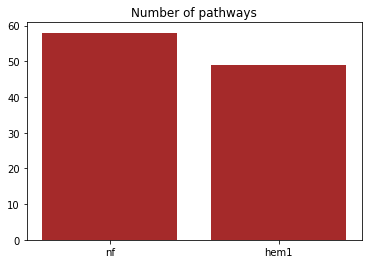

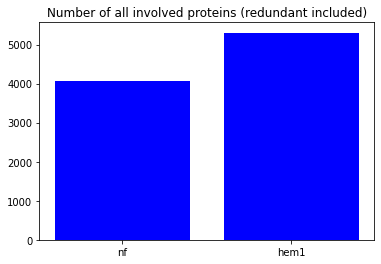

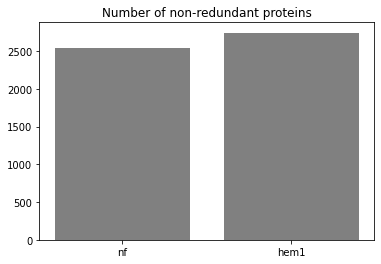

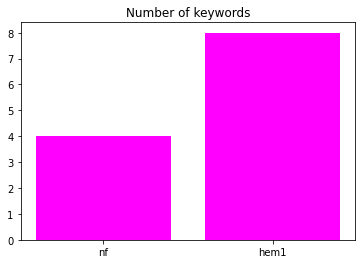

In [7]:
#COMPARE TWO DISEASES

def comparediseases (dictionary, disease):  #input list of diseases
    import matplotlib.pyplot as plt
    
    explored_diseases = exploredisease (dictionary, disease) 
    #print (explored_diseases)
    names = list(explored_diseases.keys()) #list of diseases
    values = list(explored_diseases.values())
    
    value_pathway = []
    value_allproteins = []
    value_nrproteins = []
    n_keywords = []
    
    for i in range (len(names)):
            value_pathway.append(len(values[i][0]))
            value_allproteins.append(len(values[i][1]))
            value_nrproteins.append(len(values[i][2]))
            n_keywords.append (len(disease[i]))

    plot1 = plt.bar (range (len (names)), value_pathway, tick_label=names, color = 'brown')
    plt.title ('Number of pathways')
    plt.show (plot1)

    plot2 = plt.bar (range (len (names)), value_allproteins, tick_label=names, color = 'blue')
    plt.title ('Number of all involved proteins (redundant included)')
    plt.show (plot2)

    plot3 = plt.bar (range (len (names)), value_nrproteins, tick_label=names, color = 'grey')
    plt.title ('Number of non-redundant proteins')
    plt.show (plot3)
    
    plot4 = plt.bar (range (len (names)), n_keywords, tick_label=names, color = 'magenta')
    plt.title ('Number of keywords')
    plt.show (plot4)
    
    #matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    
#comparediseases (data_dictionary, [nf, hem1])


In [8]:
#SAVE A LOCAL TXT FILE WITH DATA ON THE GIVEN DISEASE

def savetxt (dictionary, disease, filename): #input is disease that has defined keywords as list of strings
    import os.path
    path = "/Users/Iva/Documents/project/data/disease_networks/disease_pathways"
    complete_name = os.path.join (path, filename)
    file = open (complete_name, "w+")
    path = "/Users/Iva/Documents/project/data/disease_networks/disease_pathways"
    
    data = exploredisease (dictionary, disease)
    data_values = list(data.values())
    pathways = data_values [0][0] #list of pathways
    
    new_dictionary = {} #dictionary with pathways and proteins for this disease
    
    for i in pathways:
        new_dictionary [i] = data_dictionary [i]
        a = []
        a.append (i)
        a.extend (data_dictionary[i]) # this is list of pathway and subsequently all protein involved
        
        for j in a:    
            file.write("%s\t" % j)  
        file.write ('\n')     
    file.close()
    
    return(new_dictionary)
     
savetxt (data_dictionary, [nf], "nf_pathways.txt")
savetxt (data_dictionary, [alps], "alps_pathways.txt")
savetxt (data_dictionary, [wdr1], "wdr1_pathways.txt")
savetxt (data_dictionary, [hem1], "hem1_pathways.txt")
savetxt (data_dictionary, [ttc7a], "ttc7a_pathways.txt")


list of pathways, list of all proteins, list of non-redundant proteins
list of pathways, list of all proteins, list of non-redundant proteins
list of pathways, list of all proteins, list of non-redundant proteins
list of pathways, list of all proteins, list of non-redundant proteins
list of pathways, list of all proteins, list of non-redundant proteins


{'REACTOME_SIGNALING_BY_ERBB2_ECD_MUTANTS': ['3320',
  '11140',
  '2549',
  '55914',
  '6654',
  '5290',
  '5335',
  '3845',
  '1950',
  '2064',
  '5295',
  '1956',
  '6464',
  '3265',
  '2885',
  '4893'],
 'REACTOME_INTERLEUKIN_1_FAMILY_SIGNALING': ['5689',
  '240',
  '5704',
  '5685',
  '8454',
  '23118',
  '6416',
  '23198',
  '26469',
  '23291',
  '25930',
  '4791',
  '54472',
  '5705',
  '5775',
  '11213',
  '5720',
  '5711',
  '5714',
  '10454',
  '9978',
  '1511',
  '5706',
  '5684',
  '5700',
  '5693',
  '5687',
  '4792',
  '5721',
  '5688',
  '5716',
  '5713',
  '8767',
  '3551',
  '4793',
  '10392',
  '5683',
  '5599',
  '1326',
  '5709',
  '5717',
  '5608',
  '4790',
  '84867',
  '5715',
  '5777',
  '3565',
  '6500',
  '3552',
  '10213',
  '7850',
  '3554',
  '8808',
  '9173',
  '8809',
  '8807',
  '3553',
  '27178',
  '9491',
  '5690',
  '7979',
  '5782',
  '5682',
  '10197',
  '3656',
  '6885',
  '56300',
  '3557',
  '27179',
  '26525',
  '27177',
  '84639',
  '5695',
  '9

In [1]:
##### MONSTER NETWORK ###########

#data_monster is a list of lists of two interacting protein Entrey names (483644 pairs)
import networkx as nx

path = "/Users/Iva/Documents/project/data/databases/monster_ppi.txt"
data1 = open (path)

data_monster = []
data_monster_nr = []
data_monster_all = []
for i in data1:
    data_monster.append (i.split()[:2])
    data_monster_all.append(i.split())
    
for i in data_monster:
    data_monster_nr.append (i[0])
    data_monster_nr.append (i[1])
    
data_monster_nr = list(set(data_monster_nr))
    
    
G_monster = nx.Graph()
G_monster.add_edges_from(data_monster)
G_monster.remove_node('-')   


In [54]:
a = list(nx.neighbors(G_monster, '4763'))
b = []
for i in a:
    b.extend(list(nx.neighbors(G_monster, i)))
print (len(set(b)))

9329


In [12]:
file = open ("monster_clean.txt", "w")
path = "/Users/Iva/Documents/project/data"

for i in data_monster:
    for j in i:
        file.write("%s\t" % j)
    file.write ('\n')
file.close()
        

In [14]:
#### OPEN DISEASE  #####

#these are dictionaries with pathways and proteins


nf_data = savetxt (data_dictionary, [nf], "nf.txt")
alps_data = savetxt (data_dictionary, [alps], "alps.txt")
hem1_data = savetxt (data_dictionary, [hem1], "hem1.txt")
wdr1_data = savetxt (data_dictionary, [wdr1], "wdr1.txt")
ttc7a_data = savetxt (data_dictionary, [ttc7a], "ttc7a.txt")



all_dictionaries = [nf_data, alps_data, hem1_data, wdr1_data, ttc7a_data]

#starts from position 2 to remove links from the dictionary

list of pathways, list of all proteins, list of non-redundant proteins
list of pathways, list of all proteins, list of non-redundant proteins
list of pathways, list of all proteins, list of non-redundant proteins
list of pathways, list of all proteins, list of non-redundant proteins
list of pathways, list of all proteins, list of non-redundant proteins


In [15]:
#SAVE CLEAN MONSTER





In [17]:
#MAKE NEW NETWORK FOR EARCH DISEASE BASED ON A PATHWAY
# how many proteins from disease are in the network?


shared_proteins_diseases = []  #list of lists of shared proteins

for i in all_dictionaries:
    names = list (i.keys())
    values = list (i.values()) #list of lists

    shared_proteins = []
    for j in values:
        shared_proteins.extend ( list(set(j).intersection(data_monster_nr)) )

    shared_proteins_diseases.append (shared_proteins)

#######################.   NEIGHBOURHOODS   #########################
#WHAT TO ADD IN ADDITION TO WORDS FOUND IN DISEASES


#manually adding proteins causing the disease and their direct interacting proteins from the monster


shared_proteins_diseases[0].extend (list(G_monster.neighbors("4763")))
shared_proteins_diseases[1].extend (list(G_monster.neighbors("355")))
shared_proteins_diseases[2].extend (list(G_monster.neighbors("3071")))
shared_proteins_diseases[3].extend (list(G_monster.neighbors("9948")))
shared_proteins_diseases[4].extend (list(G_monster.neighbors("57217")))



nf_genes = []
alps_genes = []
hem1_genes = []
wdr1_genes = []
ttc7a_genes = []

G_nf = G_monster.subgraph(shared_proteins_diseases[0])
G_alps = G_monster.subgraph(shared_proteins_diseases[1])
G_hem1 = G_monster.subgraph(shared_proteins_diseases[2])
G_wdr1 = G_monster.subgraph(shared_proteins_diseases[3])
G_ttc7a = G_monster.subgraph(shared_proteins_diseases[4])

all_networks = [G_nf, G_alps, G_hem1, G_wdr1, G_ttc7a]

list(G_monster.neighbors("3071"))

['10152', '8522', '10006', '55660', '8290', '4851', '302', '23191', '26999']

In [18]:
a = list(G_nf_rw.nodes())
b = ['3815', '4914', '79109', '7534', '5595', '4609', '5291', '857', '2810', '207', '9846', '10971', '57622', '1956', '57521', '9672', '5371', '545', '5781', '2100', '3362', '8844', '8573', '6195', '1017', '1459', '5518', '2885', '5295', '5296', '22808', '7531', '4763', '995', '26037', '5582', '10381', '369', '6597', '6714', '8452', '6237', '2902', '9759', '4089', '3265', '6654', '1457', '5594', '5294', '6383', '7529', '9462', '1969', '2534', '1111', '7514', '22800', '4087', '2906', '3320', '4301', '5290', '999', '5921', '7341', '7846', '7706', '51564', '3845', '7074', '7532', '7415', '5430', '1499', '4088', '7157', '4893', '7533', '5894', '1742']
c = [i for i in a if i not in b]
print (len(a))
print (len(b))
word_list = []
for i, j in data_dictionary.items():
    if i.find("RAS") >= 0 or i.find("T_CELL") >= 0 or i.find("SCHWANN") >= 0 or i.find("NEURON") >= 0 or i.find("RECEPTOR") >= 0:
        continue
    print (i)
    for k in c:
        if j.count(k) >0:
            word_list.extend(i.split("_"))

words = list(set(word_list))
words_remove = ['THROUGH','PROTEINS','BIOLOGY','SYSTEM', 'THE', 'REACTOME', 'WP', 'SIGNALING', 'PATHWAY', 'BY', 'AND', 'OF', 'IN', 'PID', 'KEGG', 'BIOCARTA','MEDIATED', 'CELL']
for i in words_remove:
    words.remove(i)
print (len(words))
print (len(word_list))

word_dictionary = {}

for i in words:
    word_dictionary[i] = word_list.count(i)

word_dictionary = dict (sorted (word_dictionary.items(), key = lambda x:float(x[1]), reverse = True))
for i, j in word_dictionary.items():
    if j<10:
        break

NameError: name 'G_nf_rw' is not defined

In [17]:
#ADD ATTRIBUTES (PATHWAYS) TO NETWORKS OF DISEASES

#DICTIONARY OF DISEASES F.E. nf_data
#NETWORKS DISEASES F.E G_nf
#all_dictionaries contains all disease dictionaries (order important)
#all_networks = [G_nf, G_alps, G_hem1, G_wdr1, G_ttc7a]

def annotate (network, dictionary):
    for mynode in network.nodes():
        mypathway = ""    
        for pathway, setofnodes in dictionary.items():
            if mynode in setofnodes:
                if mypathway=="":
                    mypathway=pathway
                else:
                    mypathway+=","+pathway
    
        network.nodes[mynode]["pathway"]=mypathway
    return (network)
    
G_nf = annotate (G_nf, nf_data)
G_alps = annotate (G_alps, alps_data)
G_hem1 = annotate (G_hem1, hem1_data)
G_wdr1 = annotate (G_wdr1, wdr1_data)
G_ttc7a = annotate (G_ttc7a, ttc7a_data)


In [2]:
## ADD GENE NAMES AS ATTRIUTES WITH KEY ENTREZ ID - GENE NAME

path = "/Users/Iva/Documents/project/data/symbols2entrezIDs.txt"
data = open (path)

data = list (data)

symbol_id = []

for i in data:
    symbol_id.append (i.split ("\t")[:3])
    
symbol_id = symbol_id [1:]

    
def annotateID (network, listofnames):
    list1 = []
    for i in listofnames:
        list1.append (i[1])
    
    for node in network.nodes():
        if node in list1:
            network.nodes[node]["symbol"] = symbol_id[list1.index (node)][0]
        else:
            network.nodes[node]["symbol"] = str (node)
    return (network)
'''    
       
G_nf = annotateID(G_nf, symbol_id)
G_alps = annotateID(G_alps, symbol_id)
G_hem1 = annotateID(G_hem1, symbol_id)
G_wdr1 = annotateID(G_wdr1, symbol_id)
G_ttc7a = annotateID(G_ttc7a, symbol_id)
'''
G_monster = annotateID(G_monster, symbol_id)


In [24]:
#SAVE ANNOTADED NETWORKS AS GML FILES

import os
#os.chdir()
nx.write_gml (G_nf, "/Users/Iva/Documents/project/data/disease_networks/G_nf.gml")
nx.write_gml (G_alps, "/Users/Iva/Documents/project/data/disease_networks/G_alps.gml")
nx.write_gml (G_hem1, "/Users/Iva/Documents/project/data/disease_networks/G_hem1.gml")
nx.write_gml (G_wdr1, "/Users/Iva/Documents/project/data/disease_networks/G_wdr1.gml")
nx.write_gml (G_ttc7a, "/Users/Iva/Documents/project/data/disease_networks/G_ttc7a.gml")

#nx.write_gml (G_monster, "/Users/Iva/Documents/project/data/disease_networks/G_monster.gml")


In [29]:
#nf1 neighbors of neighbors

nf_neighbors_2=['4763']
for i in list((G_monster.neighbors('4763'))):
    nf_neighbors_2.extend(list(G_monster.neighbors(i)))
nf_neighbors_2 = list(set(nf_neighbors_2))

hem1_neighbors_2=['3071']
for i in list((G_monster.neighbors('3071'))):
    hem1_neighbors_2.extend(list(G_monster.neighbors(i)))
hem1_neighbors_2 = list(set(hem1_neighbors_2))
'''print (len(list((G_monster.neighbors('3071')))))
print (len(hem1_neighbors_2))
'''

lista=[]
for i in ['3071','60','10006','8936','10787','23191','26999','55845','253260','2475','79109','64223','55615','79899','207']:
    lista.extend(list(G_monster.neighbors(i))) 
print (len(list((G_monster.neighbors('3071')))))
print (len(lista))
print (len(hem1_neighbors_2))

9
2135
1471


In [38]:
#########   RANDOM WALKER   #############
# MAKE NEIGHBORHOD NETWORKS BASED ON RANDOM WALKERS AROUND GENES OF INTEREST
#UPLOAD OF PROBABILIYY DATA


#random walks around gene of interest
nf_rw = open ("/Users/Iva/Documents/project/data/random_walks/nf_rw.txt")
alps_rw = open ("/Users/Iva/Documents/project/data/random_walks/alps_rw.txt")
hem1_rw = open ("/Users/Iva/Documents/project/data/random_walks/hem1_rw.txt")
wdr1_rw = open ("/Users/Iva/Documents/project/data/random_walks/wdr1_rw.txt")
ttc7a_rw = open ("/Users/Iva/Documents/project/data/random_walks/ttc7a_rw.txt")

#random walks around list of proteins involved in a disease acording to literature
nf_rw_literature = open("/Users/Iva/Documents/project/data/random_walks/rw_literature/nf_rw_literature.txt")
alps_rw_literature = open("/Users/Iva/Documents/project/data/random_walks/rw_literature/alps_rw_literature.txt")
hem1_rw_literature = open("/Users/Iva/Documents/project/data/random_walks/rw_literature/hem1_rw_literature.txt")
wdr1_rw_literature = open("/Users/Iva/Documents/project/data/random_walks/rw_literature/wdr1_rw_literature.txt")
ttc7a_rw_literature = open("/Users/Iva/Documents/project/data/random_walks/rw_literature/ttc7a_rw_literature.txt")

## random walk around updated list of proteins around hem1
hem1_rw_literature_extended = open("/Users/Iva/Documents/project/data/random_walks/rw_literature/hem1_rw_literature_expanded.txt")

notch1_rw = open ("/Users/Iva/Documents/project/data/random_walks/notch1_rw.txt")
rictor_rw = open ("/Users/Iva/Documents/project/data/random_walks/rictor_rw.txt")

hem1_all_rw = open ("/Users/Iva/Documents/project/data/random_walks/rw_hem1_literature/hem1_literature_all_rw.txt")

## MAKE DICTIONARY
def rw_dictionary (file):  #makes dictionary with nodes as keys (protein entrez) and rw probabilities (values)
    data_dictionary = {}
    l = []
    for i in file:
        #key, value = i.split()
        #data_dictionary[key] = value
        l.append (i.split())

    data_dictionary = {item[0]:item[1] for item in l}
    return (data_dictionary)


nf_rw_dictionary = rw_dictionary(nf_rw)
alps_rw_dictionary = rw_dictionary(alps_rw)
hem1_rw_dictionary = rw_dictionary(hem1_rw)
wdr1_rw_dictionary = rw_dictionary(wdr1_rw)
ttc7a_rw_dictionary = rw_dictionary(ttc7a_rw)

nf_rw_literature_dictionary = rw_dictionary(nf_rw_literature)
alps_rw_literature_dictionary = rw_dictionary(alps_rw_literature)
hem1_rw_literature_dictionary = rw_dictionary(hem1_rw_literature)
wdr1_rw_literature_dictionary = rw_dictionary(wdr1_rw_literature)
ttc7a_rw_literature_dictionary = rw_dictionary(ttc7a_rw_literature)

hem1_rw_literature_dictionary_extended = rw_dictionary(hem1_rw_literature_extended)

notch1_rw_dictionary = rw_dictionary(notch1_rw)
rictor_rw_dictionary = rw_dictionary(rictor_rw)

hem1_all_dictionary = rw_dictionary(hem1_all_rw)

#TAKE CERTAIN TRESHOLD
#we take top 1% of the nodes
#already sorted, but this would be the code!!
'''import operator
nf_rw_dictionary = dict (sorted (nf_rw_dictionary.items(), key = lambda x:float(x[1]), reverse = True))'''

## CHANGE

d = [nf_rw_literature_dictionary, alps_rw_literature_dictionary, 
     hem1_rw_literature_dictionary, wdr1_rw_literature_dictionary, ttc7a_rw_literature_dictionary]

def top_rw(rw_dictionary, treshold): #takes {node:probability} and treshold f.e. 0.01 (1%)
    rw_dictionary = dict (sorted (rw_dictionary.items(), key = lambda x:float(x[1]), reverse = True))
    keys = list (rw_dictionary.keys()) #all keys are same size - monster!
    return (keys[: int (round (treshold * len(keys)))])



#MAKE NEW NETWORK WITH NEIGHBORHOOD

G_nf_rw = G_monster.subgraph(top_rw(nf_rw_dictionary, 0.01))
G_alps_rw = G_monster.subgraph(top_rw(alps_rw_dictionary, 0.01))
G_hem1_rw = G_monster.subgraph(top_rw(hem1_rw_dictionary, 0.01))
G_wdr1_rw = G_monster.subgraph(top_rw(wdr1_rw_dictionary, 0.01))
G_ttc7a_rw = G_monster.subgraph(top_rw(ttc7a_rw_dictionary, 0.01))

G_nf_rw_literature = G_monster.subgraph(top_rw(nf_rw_literature_dictionary, 0.05))
G_alps_rw_literature = G_monster.subgraph(top_rw(alps_rw_literature_dictionary, 0.02))
G_hem1_rw_literature = G_monster.subgraph(top_rw(hem1_rw_literature_dictionary, 0.05))
G_wdr1_rw_literature = G_monster.subgraph(top_rw(wdr1_rw_literature_dictionary, 0.01))
G_ttc7a_rw_literature = G_monster.subgraph(top_rw(ttc7a_rw_literature_dictionary, 0.01))


G_hem1_rw_literature_extended = G_monster.subgraph(top_rw(hem1_rw_literature_dictionary_extended, 0.05))

G_notch1_rw = G_monster.subgraph(top_rw(notch1_rw_dictionary, 0.01))
G_rictor_rw = G_monster.subgraph(top_rw(rictor_rw_dictionary, 0.01))

G_hem1_all_rw = G_monster.subgraph(top_rw(hem1_all_dictionary, 0.05))

G_nf_neighbors = G_monster.subgraph(nf_neighbors_2)




G_hem1_neighbors = G_monster.subgraph(hem1_neighbors_2)
G_nf_neighbors_1=G_monster.subgraph(list(G_monster.neighbors('4763'))+['5595', '3845','673','4893', '3265', '5604', '4763'])

#ANNOTATE ID

G_nf_rw = annotateID(G_nf_rw, symbol_id)
G_alps_rw = annotateID(G_alps_rw, symbol_id)
G_hem1_rw = annotateID(G_hem1_rw, symbol_id)
G_wdr1_rw = annotateID(G_wdr1_rw, symbol_id)
G_ttc7a_rw = annotateID(G_ttc7a_rw, symbol_id)


G_nf_rw_literature = annotateID(G_nf_rw_literature, symbol_id)
G_alps_rw_literature = annotateID(G_alps_rw_literature, symbol_id)
G_hem1_rw_literature = annotateID(G_hem1_rw_literature, symbol_id)
G_wdr1_rw_literature = annotateID(G_wdr1_rw_literature, symbol_id)
G_ttc7a_rw_literature = annotateID(G_ttc7a_rw_literature, symbol_id)

G_hem1_rw_literature_extended = annotateID(G_hem1_rw_literature_extended, symbol_id)
G_notch1_rw = annotateID(G_notch1_rw, symbol_id)
G_rictor_rw = annotateID(G_rictor_rw, symbol_id)

G_hem1_all_rw = annotateID(G_hem1_all_rw, symbol_id)
G_nf_neighbors = annotateID (G_nf_neighbors, symbol_id)
G_hem1_neighbors=annotateID (G_hem1_neighbors, symbol_id)
G_nf_neighbors_1=annotateID (G_nf_neighbors_1, symbol_id)

In [43]:
print (len(G_nf_neighbors_1.nodes()))
for i in G_nf_neighbors_1.nodes():
    print (G_nf_neighbors_1.nodes()[i])

129
{'symbol': 'CDC25C'}
{'symbol': 'HRAS', 'inliterature': 'yes'}
{'symbol': 'SRSF12'}
{'symbol': 'ANKRD34A'}
{'symbol': 'SDC2'}
{'symbol': 'RAF1'}
{'symbol': 'EIF4E2'}
{'symbol': 'NSL1'}
{'symbol': 'TIAM1'}
{'symbol': 'DENND1A'}
{'symbol': 'STMN1'}
{'symbol': 'CASK'}
{'symbol': '730426'}
{'symbol': 'YWHAH'}
{'symbol': 'SLAMF1'}
{'symbol': 'VSIG1'}
{'symbol': 'DENND4C'}
{'symbol': 'MKI67'}
{'symbol': 'TNFSF13B'}
{'symbol': 'PLEKHA7'}
{'symbol': 'STARD13'}
{'symbol': 'GRIN1'}
{'symbol': 'NXF1'}
{'symbol': 'SUMO1'}
{'symbol': 'MAP2K1', 'inliterature': 'yes'}
{'symbol': 'MAPKAP1', 'inliterature': 'yes'}
{'symbol': 'ZUFSP'}
{'symbol': 'MAGI1'}
{'symbol': 'GAB2'}
{'symbol': 'BRAF', 'inliterature': 'yes'}
{'symbol': 'PTPN14'}
{'symbol': 'P4HA3'}
{'symbol': 'SDC3'}
{'symbol': 'KSR1'}
{'symbol': 'VSIG4'}
{'symbol': 'ESR2'}
{'symbol': 'RRAS'}
{'symbol': 'CA14'}
{'symbol': 'USP21'}
{'symbol': 'NOSIP'}
{'symbol': 'INPP5E'}
{'symbol': 'FAM110B'}
{'symbol': 'PTPN11'}
{'symbol': 'SRGAP2'}
{'symbol'

In [75]:
nf_literature_proteins = [ '4763','3845', '22882', '4893', '3265', '5609', '5594']  #'4763'

file = open('nf_edges.txt', 'w')

l = len(G_nf_rw_literature.edges())

n = 0
for i in list(G_nf_rw_literature.edges()):
    n +=1
    if n != (l):
        file.write(i[0]+','+i[1]+'\n')
    if n == (l):
        file.write(i[0]+','+i[1])
file.close()


In [76]:
print (len(G_nf_rw_literature.nodes()))

#a = nx.betweenness_centrality(G_nf_rw)

940


In [24]:
for i,j in a.items():
    print (i, j)

4301 0.006851053313969995
22841 7.643464474881526e-05
6659 5.7534167312694164e-05
974 0.0006632890196166987
994 0.005471659060970803
6504 7.35366554271948e-05
5594 0.0031721075255896785
9223 0.008003071335950615
26058 0.004014682492482428
27005 0.0025530586942307354
5582 0.0010214816641627893
2041 0.0005702126556170881
3925 0.00014576395792673436
9221 0.0004455468844194773
22800 0.001117196408129856
730426 0.0014059771564977196
26037 0.00680068349460879
3265 0.003158102412240552
5784 0.001038376624685384
4288 0.001039603406924523
10673 0.00012324774454224147
5371 0.0010836723990357866
1499 0.013310690873945267
3113 0.0
1017 0.004390599637598831
25936 3.472093854964595e-05
4087 0.0014131885703395591
9672 0.00023927338414899218
6597 0.0014308512503468946
9833 0.0017251564471384667
90627 0.0007500797926023803
5290 0.0028566932121818606
3303 0.005468021301644987
51547 0.0010874063623942185
29126 0.00027501842624748677
5294 0.0006183453938003129
9462 0.0014631187857320441
5781 0.00452910181

In [40]:
### ADD COLORING TO NODES IN THE NETWORK

def color_nodes (network, listofnodes, color):    
    for i in listofnodes:
        if (i in list(network.nodes())):  
            network.nodes()[i]["inliterature"] = color

    return (network)
'''
G_nf_rw_literature = color_nodes(G_nf_rw_literature, ['4763', '3845',  '4893', '3265', '22882', '5609', '5594', '161742', '5291', '207', '2475'], "red")
G_alps_rw_literature = color_nodes(G_alps_rw_literature,['355', '356', '841', '836', '839', '840'], "red")
G_hem1_rw_literature = color_nodes(G_hem1_rw_literature,['3071', '207', '10006' ,'8936', '60'], "red")
G_wdr1_rw_literature = color_nodes(G_wdr1_rw_literature, ['9948', '60', '1072','818', '11034'], "red")
G_ttc7a_rw_literature = color_nodes(G_ttc7a_rw_literature, ['57217', '855252', '5297', '84668', '23209', '3690'], "red")
G_hem1_rw_literature_extended = color_nodes(G_hem1_rw_literature_extended,['3071', '207', '10006' ,'8936', '60', '253260','2475','79109','64223'], "red")



G_hem1_all_rw = color_nodes(G_hem1_all_rw, ['3071','60','10006','8936','10787','23191','26999','55845','253260','2475','79109','64223','55615','79899','207'], "yes")
G_nf_rw_literature = color_nodes(G_nf_rw_literature, ['5595', '3845','673','4893', '3265', '5604', '4763'], "yes")




G_nf_neighbors = color_nodes(G_nf_neighbors, ['5595', '3845','673','4893', '3265', '5604', '4763'], "yes")


G_nf_neighbors = color_nodes [['3071','60','10006','8936','10787','23191','26999','55845','253260','2475','79109','64223','55615','79899','207'], "yes")]
'''

G_nf_neighbors_1 = color_nodes(G_nf_neighbors_1, ['5595', '3845','673','4893', '3265', '5604', '4763'], "yes")



In [18]:
### ADD COLORING TO EDGES IN THE NETWORK - input list of nods

def color_edges (network, listofnodes, color):    
    #make list of edges
    listofedges = []
    for i in range(len(listofnodes)):
            for j in range(len(listofnodes)):
                if i > j:
                    if (i == '4763' and j == '3265') or (j == '4763' and i == '3265'):
                        print ("da")
                    listofedges.append((listofnodes[i], listofnodes[j]))


    for i in listofedges:
        if (i in list(network.edges())): 
            network.edges()[i]["literature"] = color
        reverse = (i[1], i[0])

        if (reverse in list(network.edges())): 
            network.edges()[i]["literature"] = color

    return (network)
'''
G_nf_rw_literature = color_edges(G_nf_rw_literature, ['4763', '3845',  '4893', '3265', '22882', '5609', '5594', '161742', '5291', '207', '2475'], "red")
G_alps_rw_literature = color_edges(G_alps_rw_literature,['355', '356', '841', '836', '839', '840'], "red")
G_hem1_rw_literature = color_edges(G_hem1_rw_literature,['3071', '207', '10006' ,'8936', '60'], "red")
G_wdr1_rw_literature = color_edges(G_wdr1_rw_literature, ['9948', '60', '1072','818', '11034'], "red")
G_ttc7a_rw_literature = color_edges(G_ttc7a_rw_literature, ['57217', '855252', '5297', '84668', '23209', '3690'], "red")
G_hem1_rw_literature_extended = color_edges(G_hem1_rw_literature_extended,['3071', '207', '10006' ,'8936', '60', '253260','2475','79109','64223'], "red")

G_hem1_all_rw = color_edges(G_hem1_all_rw, ['3071','60','10006','8936','10787','23191','26999','55845','253260','2475','79109','64223','55615','79899','207'], "yes")




G_hem1_all_rw = color_edges(G_hem1_all_rw, ['3071','60','10006','8936','10787','23191','26999','55845','253260','2475','79109','64223','55615','79899','207'], "yes")
G_nf_rw_literature = color_edges(G_nf_rw_literature, ['5595', '3845','673','4893', '3265', '5604', '4763'], "yes")


G_nf_neighbors = color_edges(G_nf_neighbors, ['5595', '3845','673','4893', '3265', '5604', '4763'], "yes")
'''

In [84]:
####  ADD COLORING ACCORDING TO PATHWAYS IN NETWORK

def color_pathway (network, pathway, color):
    
    for i in list (network.nodes()):
        if ("pathway" in network.nodes()[i]):  
            if network.nodes()[i]["pathway"].find (pathway) >= 0:
                network.nodes()[i][str(pathway)] = color
            
    return (network)

G_hem1_all_rw = color_pathway(G_hem1_all_rw, "KEGG_T_CELL_RECEPTOR_SIGNALING_PATHWAY", "yes")
G_hem1_all_rw = color_pathway(G_hem1_all_rw, "KEGG_B_CELL_RECEPTOR_SIGNALING_PATHWAY", "yes")



In [56]:
#SAVE THEM IN GML 
'''
nx.write_gml (G_nf_rw, "/Users/Iva/Documents/project/data/random_walks_networks/G_nf_rw.gml")
nx.write_gml (G_alps_rw, "/Users/Iva/Documents/project/data/random_walks_networks/G_alps_rw.gml")
nx.write_gml (G_hem1_rw, "/Users/Iva/Documents/project/data/random_walks_networks/G_hem1_rw.gml")
nx.write_gml (G_wdr1_rw, "/Users/Iva/Documents/project/data/random_walks_networks/G_wdr1_rw.gml")
nx.write_gml (G_ttc7a_rw, "/Users/Iva/Documents/project/data/random_walks_networks/G_ttc7a_rw.gml")

nx.write_gml (G_nf_rw_literature, "/Users/Iva/Documents/project/data/random_walks/rw_literature/nf_rw_literature.gml")
nx.write_gml (G_alps_rw_literature, "/Users/Iva/Documents/project/data/random_walks/rw_literature/alps_rw_literature.gml")
nx.write_gml (G_hem1_rw_literature, "/Users/Iva/Documents/project/data/random_walks/rw_literature/hem1_rw_literature.gml")
nx.write_gml (G_wdr1_rw_literature, "/Users/Iva/Documents/project/data/random_walks/rw_literature/wdr1_rw_literature.gml")
nx.write_gml (G_ttc7a_rw_literature, "/Users/Iva/Documents/project/data/random_walks/rw_literature/ttc7a_rw_literature.gml")

nx.write_gml (G_hem1_rw_literature_extended, "/Users/Iva/Documents/project/data/random_walks/rw_literature/hem1_rw_literature_extended.gml")
nx.write_gml (G_hem1_rw_literature_extended, "/Users/Iva/Documents/project/data/random_walks/rw_literature/hem1_rw_literature_extended.gml")

nx.write_gml (G_notch1_rw, "/Users/Iva/Documents/project/data/random_walks_networks/G_notch1_rw.gml")
nx.write_gml (G_rictor_rw, "/Users/Iva/Documents/project/data/random_walks_networks/G_rictor_rw.gml")



nx.write_gml (G_hem1_all_rw, "/Users/Iva/Documents/project/data/random_walks_networks/G_hem1_all_rw.gml")




#nx.write_gml (G_nf_rw_literature, "/Users/Iva/Documents/project/data/random_walks/rw_literature/nf_rw_literature.gml")
#nx.write_gml (G_alps_rw_literature, "/Users/Iva/Documents/project/data/random_walks/rw_literature/alps_rw_literature.gml")

#nx.write_gml (G_hem1_rw_literature, "/Users/Iva/Documents/project/data/random_walks/rw_literature/hem1_rw_literature.gml")
nx.write_gml (G_hem1_all_rw, "/Users/Iva/Documents/project/data/random_walks_networks/G_hem1_all_rw_att.gml")
nx.write_gml (G_nf_rw_literature, "/Users/Iva/Documents/project/data/random_walks_networks/G_nf_rw_literature_att.gml")



nx.write_gml (G_nf_neighbors, "/Users/Iva/Documents/project/data/random_walks_networks/G_nf_neighbors_att.gml")

nx.write_gml (G_nf_neighbors_1, "/Users/Iva/Documents/project/data/random_walks_networks/G_nf_neighbors_11_att.gml")
'''
#nx.write_gml (G_nf_rw_literature, "/Users/Iva/Documents/project/data/random_walks_networks/G_nf_rw_literature_att.gml")
nx.write_gml (G_nf_rw_literature, "/Users/Iva/Documents/project/data/random_walks/rw_literature/nf_rw_literature.gml")




In [48]:
a = nx.read_gml ("/Users/Iva/Documents/project/data/random_walks_networks/G_nf_neighbors_11_att.gml")

for i in list(a.nodes()):
    print (a.nodes()[i])

{'symbol': 'CDC25C'}
{'symbol': 'HRAS', 'inliterature': 'yes'}
{'symbol': 'SRSF12'}
{'symbol': 'ANKRD34A'}
{'symbol': 'SDC2'}
{'symbol': 'RAF1'}
{'symbol': 'EIF4E2'}
{'symbol': 'NSL1'}
{'symbol': 'TIAM1'}
{'symbol': 'DENND1A'}
{'symbol': 'STMN1'}
{'symbol': 'CASK'}
{'symbol': '730426'}
{'symbol': 'YWHAH'}
{'symbol': 'SLAMF1'}
{'symbol': 'VSIG1'}
{'symbol': 'DENND4C'}
{'symbol': 'MKI67'}
{'symbol': 'TNFSF13B'}
{'symbol': 'PLEKHA7'}
{'symbol': 'STARD13'}
{'symbol': 'GRIN1'}
{'symbol': 'NXF1'}
{'symbol': 'SUMO1'}
{'symbol': 'MAP2K1', 'inliterature': 'yes'}
{'symbol': 'MAPKAP1', 'inliterature': 'yes'}
{'symbol': 'ZUFSP'}
{'symbol': 'MAGI1'}
{'symbol': 'GAB2'}
{'symbol': 'BRAF', 'inliterature': 'yes'}
{'symbol': 'PTPN14'}
{'symbol': 'P4HA3'}
{'symbol': 'SDC3'}
{'symbol': 'KSR1'}
{'symbol': 'VSIG4'}
{'symbol': 'ESR2'}
{'symbol': 'RRAS'}
{'symbol': 'CA14'}
{'symbol': 'USP21'}
{'symbol': 'NOSIP'}
{'symbol': 'INPP5E'}
{'symbol': 'FAM110B'}
{'symbol': 'PTPN11'}
{'symbol': 'SRGAP2'}
{'symbol': 'N

In [92]:
file = open('hem1_nodes.csv', 'w')
for i in G_hem1_all_rw.nodes():
    file.write (i+'\n')
file.close()

In [93]:
file = open('hem1_edges.csv', 'w')
for i in G_hem1_all_rw.edges():
    file.write (i[0]+str(',')+i[1]+'\n')
file.close()

In [82]:
##### in literature - base networks, hw many are actually interconnected?

#
#
# HOW LARGE IS THE LARGEST DIRECT CONNECTED COMPONENT (LCC) OF MY PROTEINS OF INTEREST IN A GIVEN NETWORK ? 
#
#

# what you will need:
#
#
#
# G: a network (or subnetwork)
# my_genes_innet: proteins that you want to check direct connectivity of
#
#
#

import networkx as nx

def dispersion(G, my_genes_innet):
    mysub=nx.subgraph(G, my_genes_innet) # the subnetwork of genes on interest
    mycon_comp=nx.connected_components(mysub) # get all the connected components 
    mysize=len(sorted(mycon_comp,key=len, reverse=True)[0]) # how big is the largest connected component? 

    mysize_relative=mysize/len(my_genes_innet) # how big is the lcc compared to the gene set?
    
    return(mysize_relative)

print ("nf", dispersion(G_nf_rw_literature, ['4763', '3845',  '4893', '3265', '22882', '5609', '5594', '161742', '5291', '207', '2475']))
print ("alps", dispersion(G_alps_rw_literature, ['355', '356', '841', '836', '839', '840']))
print ("hem1", dispersion(G_hem1_rw_literature, ['3071', '207', '10006' ,'8936', '60']))
print ("wdr1", dispersion(G_wdr1_rw_literature, ['9948', '60', '1072','818', '11034']))
print ("ttc7a", dispersion(G_ttc7a_rw_literature, ['57217', '855252', '5297', '84668', '23209', '3690']))
                                    

nf 0.9090909090909091
alps 1.0
hem1 1.0
wdr1 0.8
ttc7a 0.16666666666666666


In [24]:
print (len (list(G_monster.neighbors('4851'))))

271


In [41]:
# list of common nodes between rw & network pathways
a = set (G_nf_rw.nodes())
b = set (G_nf.nodes ())
print (len(a))
common_nf = list(set (G_nf_rw.nodes()) & set (G_nf.nodes ()))
common_alps = list(set (G_alps_rw.nodes()) & set (G_alps.nodes ()))
common_hem1 = list(set (G_hem1_rw.nodes()) & set (G_hem1.nodes ()))
common_wdr1 = list(set (G_wdr1_rw.nodes()) & set (G_wdr1.nodes ()))
common_ttc7a = list(set (G_ttc7a_rw.nodes()) & set (G_ttc7a.nodes ()))

print (len(G_nf.nodes()))
#list of specific for rw network

specific_nf_rw = [i for i in list(G_nf_rw.nodes()) if i not in common_nf]
specific_alps_rw = [i for i in list(G_alps_rw.nodes()) if i not in common_alps]
specific_hem1_rw = [i for i in list(G_hem1_rw.nodes()) if i not in common_hem1]
specific_wdr1_rw = [i for i in list(G_wdr1_rw.nodes()) if i not in common_wdr1]
specific_ttc7a_rw = [i for i in list(G_ttc7a_rw.nodes()) if i not in common_ttc7a]


#list of specific for pathway network - not so importnat because there are too many

specific_nf = [i for i in list(G_nf.nodes()) if i not in common_nf]
specific_alps = [i for i in list(G_alps.nodes()) if i not in common_alps]
specific_hem1 = [i for i in list(G_hem1.nodes()) if i not in common_hem1]
specific_wdr1 = [i for i in list(G_wdr1.nodes()) if i not in common_wdr1]
specific_ttc7a = [i for i in list(G_ttc7a.nodes()) if i not in common_ttc7a]
    

#which pathways do they predominantly belong to?


print (len(specific_nf_rw))
print (len(specific_alps_rw))
print (len(specific_hem1_rw))
print (len(specific_wdr1_rw))
print (len(specific_ttc7a_rw))

print ('---')
print (len(common_nf))
print (len(common_alps))
print (len(common_hem1))
print (len(common_wdr1))
print (len(common_ttc7a))

188
2528
22
30
113
53
100
---
166
158
75
135
88


266
3071 0.00033235079134207686
18818
0.01413540227441811


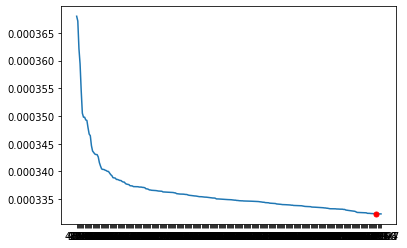

In [27]:
n=0
for i,j in notch1_rw_dictionary.items():
    n+=1
    if i == "3071":
        print (n)
    #print (G_notch1_rw.nodes()[i]['symbol'])
        print (i, j)
print(len(notch1_rw_dictionary)) 
print (266/18818)

x = list(notch1_rw_dictionary.keys())[1:270]
y = list(notch1_rw_dictionary.values())[1:270]
y1 = []
for i in y:
    y1.append(float(i))

ax = plt.plot(x,y1)
ax = plt.plot(["3071"], [0.00033235079134207686], marker='o', markersize=5, color = "red")
#plt.show(ax)

In [ ]:
#HEM1 and WDR1 in more detail

#how many common proteins for hem1 and wdr1

common_hem1_wdr1 = list (set(G_ttc7a_rw.nodes()) & set(G_hem1_rw.nodes()))
common_ttc7a_wdr1 = list (set(G_wdr1_rw.nodes()) & set(G_ttc7a_rw.nodes()))
common_nf_ttc7a = list (set(G_nf_rw.nodes()) & set(G_ttc7a_rw.nodes()))
common_alps_ttc7a = list (set(G_nf_rw.nodes()) & set(G_ttc7a_rw.nodes()))
common_nf_ttc7a = list (set(G_nf_rw.nodes()) & set(G_ttc7a_rw.nodes()))

print (len (common_hem1_wdr1))
print (len (common_nf_wdr1))
print (len (common_nf_hem1))
    


In [19]:
#for presentation

G_nf_neighbors_monster = G_monster.subgraph(list (G_monster.neighbors ("4763")) + ["4763"] )
G_ttc7a_neighbors_monster = G_monster.subgraph(list (G_monster.neighbors ("57217")) + ["57217"] )
G_hem1_neighbors_monster = G_monster.subgraph(list (G_monster.neighbors ("3071")) + ["3071"] )


print (len (G_nf_neighbors_monster))
nx.write_gml (G_nf_neighbors_monster, "/Users/Iva/Documents/project/data/G_nf_all_neighbors.gml")
nx.write_gml (G_ttc7a_neighbors_monster, "/Users/Iva/Documents/project/data/G_ttc7a_all_neighbors.gml")
nx.write_gml (G_hem1_neighbors_monster, "/Users/Iva/Documents/project/data/G_hem1_all_neighbors.gml")


126


In [286]:
#GENERAL CHARACTERISTICS OF PATHWAY NETWORKS - OPTIMIZE AND MAKE A FUNCTION


#########     DEGREE DISTRIBUTION
'''degree = G_nf.degree ()
degree_dist = []
frequencies = []

for i in degree:
    degree_dist.append (i[1])
    
degree_dist.sort()
plot = plt.hist (degree_dist)
plt.xlabel ("degree of nodes")
plt.ylabel("frequency")
plt.title ("Degree distribution")
plt.show()

###########      NUMBER OF NODES

plot1 = plt.bar (['nf', 'alps', 'hem1', 'wdr1', 'ttc7a'], height = [G_nf.number_of_nodes(), G_alps.number_of_nodes(), 
             G_hem1.number_of_nodes(), G_wdr1.number_of_nodes(), 
            G_ttc7a.number_of_nodes()])
plt.ylabel ("Number of nodes")
plt.show(plot1)


###########        NUMBER OF CONNECTED NODES

plot2 = plt.bar (['nf', 'alps', 'hem1', 'wdr1', 'ttc7a'], height = [(G_nf.number_of_nodes() - len (list (nx.isolates (G_nf)))),
                                                                    (G_alps.number_of_nodes() - len (list (nx.isolates (G_alps)))),
                                                                    (G_hem1.number_of_nodes() - len (list (nx.isolates (G_hem1)))), 
                                                                    (G_wdr1.number_of_nodes() - len (list (nx.isolates (G_wdr1)))),
                                                                    (G_ttc7a.number_of_nodes() - len (list (nx.isolates (G_ttc7a))))])
plt.ylabel ("Number of non-isolated nodes")
plt.show(plot2)


############       NUMBER OF EDGES

plot3 = plt.bar (['nf', 'alps', 'hem1', 'wdr1', 'ttc7a'], height = [G_nf.number_of_edges(), 
                                                                    G_alps.number_of_edges(), 
             G_hem1.number_of_edges(), G_wdr1.number_of_edges(), 
            G_ttc7a.number_of_edges()])
plt.ylabel ("Number of edges")
plt.show(plot3)


###########         NUMBER OF PATHWAYS in EACH DISEASE

def n_pathways (network):
    list1 = []
    for i in network.nodes():
        if network.nodes[i]["pathway"] != '':
            list1.extend(network.nodes[i]["pathway"].split(","))
        
    return (list1)
    
plot6 = plt.bar (['nf', 'alps', 'hem1', 'wdr1', 'ttc7a'], height = [len (n_pathways(G_nf)), 
                                                                    len (n_pathways(G_alps)),
                                                                   len (n_pathways(G_hem1)),
                                                                   len (n_pathways(G_wdr1)),
                                                                   len (n_pathways(G_ttc7a))])
plt.ylabel ("Number of pathways involved in disease")
plt.show(plot6)     

n_pathways (G_nf_annotated)


#NUMBER OF FIRST NEIGHBOURS TO GENE CAUSEING THE DISEASE
#return list of first neighbours for given gene in given network

def n_neighbours (network, geneID):
    listofneighbours = []
    for i in list(network.edges()):
        if i[0] == geneID:
            listofneighbours.append (i[1])
        if i[1] == geneID:
            listofneighbours.append (i[0])
    listofneighbours=list(set(listofneighbours))
    return (listofneighbours)
        

plot4 = plt.bar (['nf', 'alps', 'hem1', 'wdr1', 'ttc7a'], [len (list((G_nf.neighbors("4763")))), 
                                                          len (list((G_alps.neighbors("355")))),
                                                          len (list((G_hem1.neighbors("3071")))),
                                                          len (list((G_wdr1.neighbors ("9948")))),
                                                          len (list((G_ttc7a.neighbors ("57217"))))])
plt.ylabel ("Number of first neighbours in disease network") 
plt.show (plot4)


plot5 = plt.bar (['nf', 'alps', 'hem1', 'wdr1', 'ttc7a'], [len (list((G_monster.neighbors("4763")))), 
                                                          len (list((G_monster.neighbors("355")))),
                                                          len (list((G_monster.neighbors("3071")))),
                                                          len (list((G_monster.neighbors ("9948")))),
                                                          len (list((G_monster.neighbors ("57217"))))])

plt.ylabel ("Number of first neighbours in monster") 
plt.show (plot5)'''

'degree = G_nf.degree ()\ndegree_dist = []\nfrequencies = []\n\nfor i in degree:\n    degree_dist.append (i[1])\n    \ndegree_dist.sort()\nplot = plt.hist (degree_dist)\nplt.xlabel ("degree of nodes")\nplt.ylabel("frequency")\nplt.title ("Degree distribution")\nplt.show()\n\n###########      NUMBER OF NODES\n\nplot1 = plt.bar ([\'nf\', \'alps\', \'hem1\', \'wdr1\', \'ttc7a\'], height = [G_nf.number_of_nodes(), G_alps.number_of_nodes(), \n             G_hem1.number_of_nodes(), G_wdr1.number_of_nodes(), \n            G_ttc7a.number_of_nodes()])\nplt.ylabel ("Number of nodes")\nplt.show(plot1)\n\n\n###########        NUMBER OF CONNECTED NODES\n\nplot2 = plt.bar ([\'nf\', \'alps\', \'hem1\', \'wdr1\', \'ttc7a\'], height = [(G_nf.number_of_nodes() - len (list (nx.isolates (G_nf)))),\n                                                                    (G_alps.number_of_nodes() - len (list (nx.isolates (G_alps)))),\n                                                                    (G_hem1.n

In [59]:
# NETWORKS OF FIRST NEIGHBOURS OF OUR GENES OF INTEREST FOR PATHWAY NETWORKS

#HOW MANY PATHWAYS ARE THEY CONNECTED TO
'''
nf_neighbors = list (G_nf.neighbors ("4763")) 
alps_neighbors = list (G_alps.neighbors ("355"))
hem1_neighbors = list (G_hem1.neighbors ("3071"))
wdr1_neighbors = list (G_wdr1.neighbors ("9948"))
ttc7a_neighbors = list (G_ttc7a.neighbors ("57217"))

G_nf_neighbors = G_nf.subgraph(nf_neighbors)
G_alps_neighbors = G_alps.subgraph(alps_neighbors)
G_hem1_neighbors = G_hem1.subgraph(hem1_neighbors)
G_wdr1_neighbors = G_wdr1.subgraph(wdr1_neighbors)
G_ttc7a_neighbors = G_ttc7a.subgraph(ttc7a_neighbors)

'''



'''plot6 = plt.bar (['nf', 'alps', 'hem1', 'wdr1', 'ttc7a'], height = [len (n_pathways(G_nf_neighbors)), 
                                                                    len (n_pathways(G_alps_neighbors)),
                                                                   len (n_pathways(G_hem1_neighbors)),
                                                                   len (n_pathways(G_wdr1_neighbors)),
                                                                   len (n_pathways(G_ttc7a_neighbors))])
plt.ylabel ("Number of pathways involved in first neighbours")
plt.show(plot6)     '''



### TOP N PATHWAYS

def top_pathways (listofpathways, n): #n is number of itteration of the pathways

    dict1 = {}
    list_nr = list(set(listofpathways))
    
    for i in list_nr:
        dict1[i] = listofpathways.count (i)
    
    for i in list (dict1.keys()):
        if dict1[i] > n:
            print (i, dict1[i])
        
    return(dict1)

a = n_pathways(G_alps_neighbors)
alps = top_pathways (a, 10)
import operator
alps_sorted = dict (sorted (alps.items(), key = operator.itemgetter(1), reverse = True))

#print (alps_sorted)


NameError: name 'n_pathways' is not defined

SyntaxError: invalid syntax (<ipython-input-1-1ab54fbd4095>, line 1)